# Challenge 1

## Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [2]:
fitbit=pd.read_csv('data/Fitbit2.csv')
df = fitbit
df.head(5)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


## Coding Session I

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?


Text(0, 0.5, 'Average')

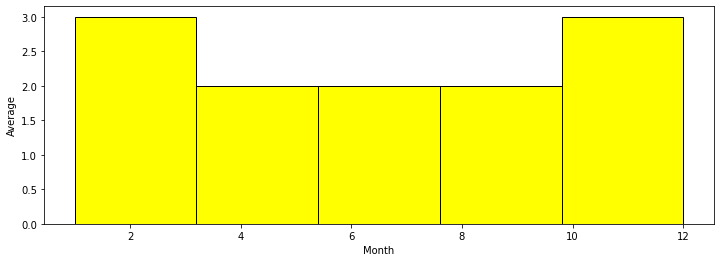

In [3]:
print('How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?')

'''
Aca lo que voy a hacer es crear una nueva dataframe basado 
en un groupy por el promedio de Steps por Month_Enclosed

'''
df_months = pd.DataFrame(df.groupby(['Months_encoded'])['Steps'].mean())

'ahora a reiniciar los indices para tener a months encoded como columna'

df_months = df_months.reset_index()

'ahora a graficar'

plt.figure(figsize = (12,4))
plt.hist(df_months['Months_encoded'], edgecolor = "black", 
                        facecolor = "yellow", 
                        bins = 5)
plt.xlabel('Month') 
plt.ylabel('Average')

Is Fitbitter more active on weekend or workdays?


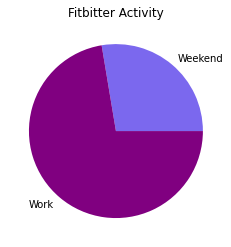

Fitbitter is clearly more active by the Work Week time


In [4]:
print('Is Fitbitter more active on weekend or workdays?')

'''
Para averiguar eso, voy a utilizar la columna [work_or_weekend]
al hacer eso, me di cuenta que cuando es fin de semana es 0, la cual me limita hacer algo inmediato.
entonces me he creado una nueva columna llamada [Work_classification] utilizando np.where.
cuando es 1 significa que es durante la semana, y cuando no es el fin de semana

'''

df['Work_classification'] = np.where(df['Work_or_Weekend'] == 1, 'Work', 'Weekend')

'''
Ahora quiero utilizar esa columna para crear un nuevo dataframe df_work
donde aplique un groupby para la suma de [Calorie burned] por Week or Weekend y count de los work or weekend. 
resetear los indices lo hago para que [work_classification] sea las labels de mi pie chart

'''

df_work = pd.DataFrame(df.groupby([df['Work_classification']])["Calorie burned"].sum())
df_work = df_work.reset_index()


'''
Ahora a equipar el pie chart:
    1.a definir colores creando la nueva variable colors (nombre de colores desde la doc)
    2.utilizamos Date como data entry
    3.para poder leer bien el pie chart utilicé work_classification como leyenda
    4.titulo para que ayude al lector'''

colors = ['mediumslateblue', 'purple']

plt.pie(df_work['Calorie burned'], 
       labels = df_work["Work_classification"], 
       colors = colors) 

plt.title("Fitbitter Activity") 
plt.show();

print("Fitbitter is clearly more active by the Work Week time")

## Coding Session II 

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**